# STA 141B: Homework 3

## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

* __Files that need to be organized.__

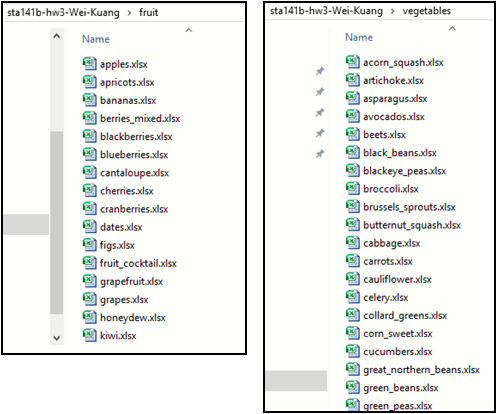

In [2]:
from PIL import Image
Files_img = Image.open("Files_show.png")
Files_img

* __Each file has a messy content. Let's extract wanted information.__

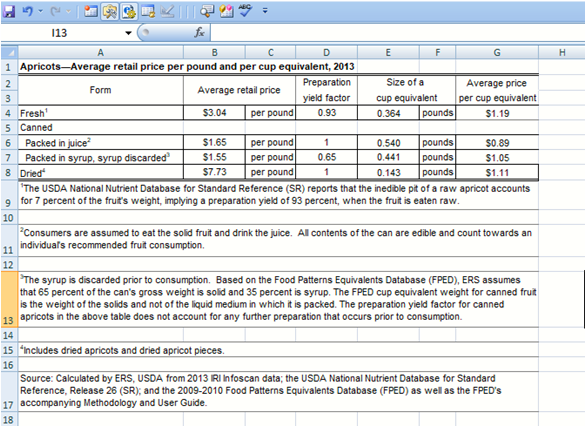

In [3]:
from PIL import Image
Files_img = Image.open("file_content.png")
Files_img

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

#### Analyze the file structure

In [4]:
# Import necessary packages
import os             # Process the file path
import pandas as pd   # Data Frame
import numpy as np    # Matrix operation

In [5]:
# Assign folder for working directory
path = 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit'
# Set up the working directory
os.chdir(path)
# Checj my current working directory
os.getcwd()

'C:\\Users\\WeiKuang\\Documents\\GitHub\\sta141b-hw3-Wei-Kuang\\fruit'

In [6]:
# List all files in the current directory
file_list = os.listdir() 
# Note: file_list = os.listdir(path) will work too!
file_list[0:5]

['apples.xlsx',
 'apricots.xlsx',
 'bananas.xlsx',
 'berries_mixed.xlsx',
 'blackberries.xlsx']

In [7]:
# Read a excel file
dframe = pd.read_excel('apples.xlsx')
dframe.loc[0:10,:]

,"Apples—Average retail price per pound or pint and per cup equivalent, 2013",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Form,Average retail price,NaN,Preparation,Size of a,NaN,Average price
1,NaN,NaN,NaN,yield factor,cup equivalent,NaN,per cup equivalent
2,Fresh1,1.56752,per pound,0.9,0.242508,pounds,0.422373
3,Applesauce2,1.07782,per pound,1,0.540133,pounds,0.582168
4,Juice,NaN,NaN,NaN,NaN,NaN,NaN
5,Ready to drink3,0.727288,per pint,1,8,fl oz,0.363644
6,Frozen4,0.537868,per pint,1,8,fl oz,0.268934
7,1The USDA National Nutrient Database for Stand...,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2Excludes applesauce packed in individual cont...,NaN,NaN,NaN,NaN,NaN,NaN


__NOTE:__
1. The requested information is in the [0, 1, 3, 4, 6]-th columns.

#### My testing section

In [8]:
# Function pipe line preparation

# File reading
path= 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit'
file_list = os.listdir(path) 

# Info extraction
food_type = path.split('/')[6]

# Read a excel file
f=2 # f: file index, for example f=0 is the 1st file in the folder

excel_df = pd.read_excel(file_list[f])
excel_df

# Note: this file has no fresh row

,"Bananas—Average retail price per pound and per cup equivalent, 2013",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Form,Average retail price,NaN,Preparation,Size of a,NaN,Average price
1,NaN,NaN,NaN,yield factor,cup equivalent,NaN,per cup equivalent
2,Fresh1,0.566983,per pound,0.64,0.330693,pounds,0.292965
3,1The USDA National Nutrient Database for Stand...,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Source: Calculated by ERS, USDA from 2013 IRI ...",NaN,NaN,NaN,NaN,NaN,NaN


__My 1st method to Exercise 1.1__

In [9]:
# Make a function to extract information
def food_data_method1(path):
    '''Read the excel files and extract the data of our interets
    Arguments: the path of file
    Return:  a dataframe
    '''
    
    # Prepare an empty dataframe
    DF = pd.DataFrame()
    
    # Set up the working directory
    os.chdir(path)
    
    # load the files 
    file_list = os.listdir(path) 
       
    # For loop to iterate all files in the folder
    for file_name in file_list:
        # Read a excel file
        excel_df = pd.read_excel(file_name)
        # Find the rows related to "Fresh" by checking the index of True
        logic_row_select = excel_df.iloc[:,0].str.contains('Fresh*').fillna(False)
        index_True = np.where(logic_row_select==True)[0]
        # Check if there is true ( If index_True.size == 0, then the file has no row of "fresh*" )

        if index_True.size==0:
            # print(file_name," has no Fresh row.")
            pass # Do not thing
        else:
            # print(file_name," has Fresh row")
            df = excel_df.loc[logic_row_select,:]
            
            # Food type and food type
            food_type= path.split('/')[6]
            food_name = file_name.split('.')[0]
            # Make a small dataframe
            df2 = pd.DataFrame({"food":[food_name], "type":[food_type]})
            # Other information
            df3 = df.iloc[:, [0,1,3,4,6]]
            # Correct the col name
            df3.columns = ["form", "price_per_lb", "yield", "lb_per_cup", "price_per_cup"]
            # Reset the row index so column bine can be performed
            df3 = df3.reset_index(drop=True)
            # Merge two dataframe using "cbind" ( axis = 1 ; column-wise)
            df4= pd.concat([df2, df3], axis=1)
            # Append the df into one big DataFrame (row-bind)
            DF = DF.append(df4)
        
    return DF

In [10]:
path= 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit'
Fruit_DF = food_data_method1(path)
Fruit_DF

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,apples,fruit,Fresh1,1.56752,0.9,0.242508,0.422373
0,apricots,fruit,Fresh1,3.04007,0.93,0.363763,1.1891
0,bananas,fruit,Fresh1,0.566983,0.64,0.330693,0.292965
0,blackberries,fruit,Fresh1,5.77471,0.96,0.31967,1.92292
0,blueberries,fruit,Fresh1,4.73462,0.95,0.31967,1.59318
0,cantaloupe,fruit,Fresh1,0.535874,0.51,0.374786,0.3938
0,cherries,fruit,Fresh1,3.59299,0.92,0.341717,1.33455
0,grapefruit,fruit,Fresh1,0.897802,0.49,0.462971,0.848278
0,grapes,fruit,Fresh1,2.09383,0.96,0.330693,0.721266
0,honeydew,fruit,Fresh1,0.796656,0.46,0.374786,0.649077


__My 2nd method to Exercise 1.1__

In [11]:
# Step 1: Function 
def food_data_method2(path):
    '''Read the excel files and extract the data of our interets
    Arguments: the path of file
    Return:  a dataframe
    '''
    
    # read file
    df = pd.read_excel(path)

    # correction for tomatoes
    is_fresh = df.iloc[:,0].str.contains('Fresh*').fillna(False)
    df=df.loc[is_fresh,:]
    
    # correction for pineapple
    df=df.iloc[:,0:7]      
    
    # extract food and type fron the path
    n = os.path.splitext(path) # split the filename and type
    food_name = n[0].split('/')[7]
    type_name = n[0].split('/')[6]
    
    # Correct the column to mathc the example
    df = df.drop(df.columns[[2,5]], axis =1) #  Remove Unnamed: 2 and Unnamed: 5
    df.columns = ['form', 'price_per_lb','yield', 'lb_per_cup','price_per_cup'] # rename the col
    
    # add the type and food
    df.insert(0,'food',food_name)
    df.insert(0,'type',type_name)
    
    return df


# Step 2: Read all files in the fruit directory
path = 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit'
file_list = os.listdir(path) # this will list all the file names in my working directory

# manually create a complete path for each excel file
newPath = [path + '/' + excel for excel in file_list]
print(newPath[0:5])

# Step 3: Let's read all the files in the fruit directory
F_Data = pd.DataFrame(pd.np.empty((0, 7))) # create a empty dataframe with 7 cols
F_Data.columns = ['type','food','form', 'price_per_lb','yield', 'lb_per_cup','price_per_cup']

# Step 4: Execution
for i in newPath:
    F_Data = F_Data.append( food_data_method2(i)) #  food_data_method2() is my fucntion
    
#### Testing  ####    
F_Data

['C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit/apples.xlsx', 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit/apricots.xlsx', 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit/bananas.xlsx', 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit/berries_mixed.xlsx', 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit/blackberries.xlsx']


,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
2,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
2,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
2,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
2,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
2,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
2,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
2,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
2,fruit,grapes,Fresh1,2.09383,0.96,0.330693,0.721266
2,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

__Method1 to Exercise 1.2:__

In [12]:
path = 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/vegetables'
Veg_DF = food_data_method1(path)
Veg_DF

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,acorn_squash,vegetables,Fresh1,1.17225,0.458554,0.451948,1.15536
0,artichoke,vegetables,Fresh1,2.21305,0.375309,0.385809,2.27497
0,asparagus,vegetables,Fresh1,3.21349,0.493835,0.396832,2.58227
0,avocados,vegetables,Fresh1,2.23587,0.740753,0.31967,0.964886
0,broccoli,vegetables,Fresh,,,,NaN
0,brussels_sprouts,vegetables,Fresh1,2.76355,1.06,0.341717,0.890898
0,butternut_squash,vegetables,Fresh1,1.24474,0.714,0.451948,0.787893
0,cabbage,vegetables,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
1,NaN,NaN,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
0,carrots,vegetables,Fresh,NaN,NaN,NaN,NaN


__Method2 to Exercise 1.2:__

In [13]:
# Set the working directory
path = 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/vegetables'
# List all the file names in my working directory
file_list = os.listdir(path) 

# manually create a complete path for each excel file
newPath = [path + '/' + excel for excel in file_list]

# Creat empty data frame with designed column name.
Veg_Data = pd.DataFrame(np.empty((0, 7)))
Veg_Data.columns = ['type','food','form', 'price_per_lb','yield', 'lb_per_cup','price_per_cup']

for i in newPath:
    Veg_Data = Veg_Data.append( food_data_method2(i)) 
    
Veg_Data.head(10)    

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
2,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
2,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
2,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
2,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
2,vegetables,broccoli,Fresh,,,,NaN
2,vegetables,brussels_sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
2,vegetables,butternut_squash,Fresh1,1.24474,0.714,0.451948,0.787893
2,vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
3,vegetables,cabbage,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
2,vegetables,carrots,Fresh,NaN,NaN,NaN,NaN


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

Remove the rows which have NaN or empty space " "

In [14]:
# Select the row that has missing in price
a= np.array(['nan'== x for x in Veg_DF.iloc[:,3].astype(str)])  # missing data in excel file
b= np.array([' '  == x for x in Veg_DF.iloc[:,3].astype(str)])  # empty space in excel file
selection = np.logical_or(a,b)
remove = [False == i for i in selection]
Veg_DF_Clean = Veg_DF.iloc[remove,:]
Veg_DF_Clean

# Other method
# Veg_Data.dropna(axis=0, how='any') # if a row has any "na" then remove that row

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,acorn_squash,vegetables,Fresh1,1.17225,0.458554,0.451948,1.15536
0,artichoke,vegetables,Fresh1,2.21305,0.375309,0.385809,2.27497
0,asparagus,vegetables,Fresh1,3.21349,0.493835,0.396832,2.58227
0,avocados,vegetables,Fresh1,2.23587,0.740753,0.31967,0.964886
0,brussels_sprouts,vegetables,Fresh1,2.76355,1.06,0.341717,0.890898
0,butternut_squash,vegetables,Fresh1,1.24474,0.714,0.451948,0.787893
0,cabbage,vegetables,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
1,NaN,NaN,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
0,collard_greens,vegetables,Fresh1,2.63084,1.16,0.286601,0.650001
0,corn_sweet,vegetables,Fresh1,2.69062,0.54,0.363763,1.8125


Combine the fruit and vegetable data frames 

In [21]:
Big_DF = Fruit_DF.append(Veg_DF_Clean)
Big_DF = Big_DF.dropna(axis=0, how='any')
Big_DF

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,apples,fruit,Fresh1,1.56752,0.9,0.242508,0.422373
0,apricots,fruit,Fresh1,3.04007,0.93,0.363763,1.1891
0,bananas,fruit,Fresh1,0.566983,0.64,0.330693,0.292965
0,blackberries,fruit,Fresh1,5.77471,0.96,0.31967,1.92292
0,blueberries,fruit,Fresh1,4.73462,0.95,0.31967,1.59318
0,cantaloupe,fruit,Fresh1,0.535874,0.51,0.374786,0.3938
0,cherries,fruit,Fresh1,3.59299,0.92,0.341717,1.33455
0,grapefruit,fruit,Fresh1,0.897802,0.49,0.462971,0.848278
0,grapes,fruit,Fresh1,2.09383,0.96,0.330693,0.721266
0,honeydew,fruit,Fresh1,0.796656,0.46,0.374786,0.649077


Make sure all columns of numbers are numeric (not strings).
1. df.apply(pd.to_numeric, errors='ignore')
2. Action: all columns that can be converted to a numeric type will be converted.
3. If columns that contain non-digit strings or dates, the these columns won't be converted.

In [22]:
Big_DF = Big_DF.apply(pd.to_numeric, errors='ignore')
Big_DF.head()

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,apples,fruit,Fresh1,1.567515,0.90,0.242508,0.422373
0,apricots,fruit,Fresh1,3.040072,0.93,0.363763,1.189102
0,bananas,fruit,Fresh1,0.566983,0.64,0.330693,0.292965
0,blackberries,fruit,Fresh1,5.774708,0.96,0.319670,1.922919
0,blueberries,fruit,Fresh1,4.734622,0.95,0.319670,1.593177


Check if all the numeric columns have numeric data type

In [23]:
Big_DF.dtypes
# pd.dtypes display the data type for columns in the dataframe

food              object
type              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

In [24]:
# correct the index of my dataframe
# drop parameter to avoid the old index being added as a column
Big_DF= Big_DF.reset_index(drop=True)
Big_DF.head()

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,apples,fruit,Fresh1,1.567515,0.90,0.242508,0.422373
1,apricots,fruit,Fresh1,3.040072,0.93,0.363763,1.189102
2,bananas,fruit,Fresh1,0.566983,0.64,0.330693,0.292965
3,blackberries,fruit,Fresh1,5.774708,0.96,0.319670,1.922919
4,blueberries,fruit,Fresh1,4.734622,0.95,0.319670,1.593177


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

1. What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
2. How do the price distributions compare for fruit and vegetables?
3. Which foods are the best value for the price?
4. What's something surprising about this data set?


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### 1. What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?

__ANS:__ Raspberries is the most expensive,  \$ 6.97581 per pound.
Watermelon is the least expensive,  \$ 0.333412 per pound.


* Least expensive is watermelon

In [50]:
selection= Big_DF.loc[:, 'price_per_lb'].idxmin()
Big_DF.loc[:,('food','price_per_lb')].iloc[selection,:]

food            watermelon
price_per_lb      0.333412
Name: 23, dtype: object

* Most expensive is raspberries

In [52]:
selection= Big_DF.loc[:, 'price_per_lb'].idxmax()
Big_DF.loc[:,('food','price_per_lb')].iloc[selection,:]

food            raspberries
price_per_lb        6.97581
Name: 20, dtype: object

* Data Visualization

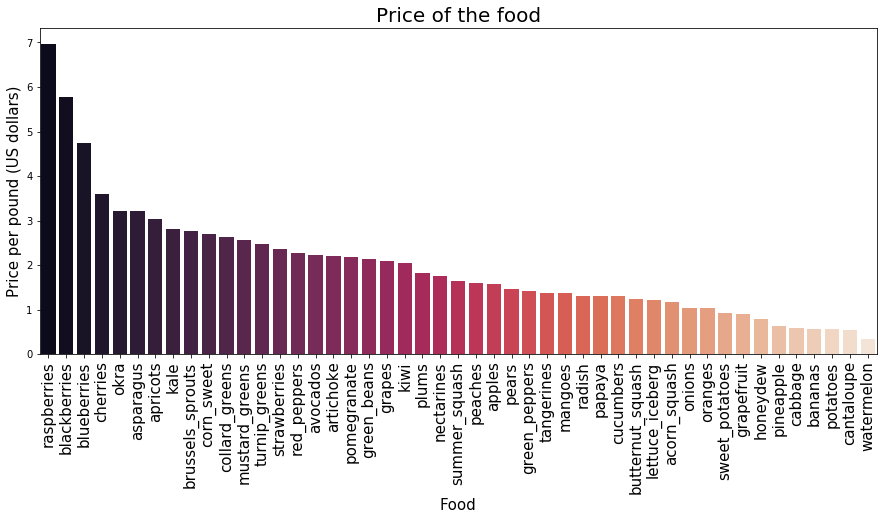

In [79]:
# Order the price
Big_DF = Big_DF.sort_values(by='price_per_lb', ascending=False)

# Plot Size
figure(figsize=(15,6)) 

# Plotting
sns.barplot(x=Big_DF['food'], y=Big_DF['price_per_lb'], palette="rocket")
plt.title('Price of the food',fontsize=20 )
plt.xlabel("Food", fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel("Price per pound (US dollars)", fontsize=15)
plt.show()

### 2. How do the price distributions compare for fruit and vegetables?
__Ans:__ (1)The price distributions for fruit is skewed to the right, suggesting that some of fruits are extremly expensive. In contrast, The price distributions for fruit is mostly centered at \$ 2 per pound. (2) From the boxplot, the median price per pound for fruit and vegetable are similar.  

In [108]:
# Select the row where type = "fruit"
Fruit = DF1[[('fruit' in a) for a in Big_DF['type']]]

# Select the row where type = "vegetables"
Veg = DF1[[('vegetables' in a) for a in Big_DF['type']]]

Veg.head(5)

,type,price_per_lb
39,vegetables,3.213552
26,vegetables,3.213494
36,vegetables,2.807302
28,vegetables,2.763553
32,vegetables,2.690623


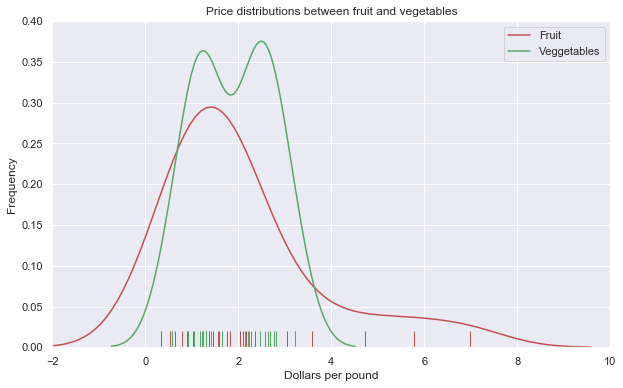

In [119]:
# Plot
# reference: https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})

F = sns.distplot(Fruit.loc[:,'price_per_lb'], hist=False, rug=True, color ='r',label="Fruit")
V = sns.distplot(Veg.loc[:,'price_per_lb'], hist=False, rug=True, color ='g',label="Veggetables")
V.set(xlim=(-2,10), ylim=(0, 0.4))
V.set(title= "Price distributions between fruit and vegetables",xlabel='Dollars per pound', ylabel='Frequency')
plt.show()

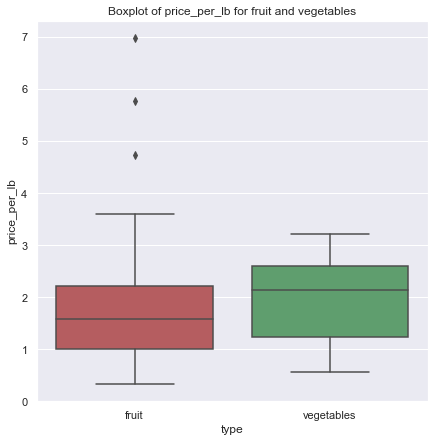

In [134]:
# boxplot
sns.set(rc={'figure.figsize':(7,7)})
Boxplot = sns.boxplot(x="type", y="price_per_lb", data=Big_DF, palette=["r", "g"])
Boxplot.set(title= "Boxplot of price_per_lb for fruit and vegetables",xlabel='type', ylabel='price_per_lb')
plt.show()

### 3. Which foods are the best value for the price?
__Ans:__ The best value is what we could spend the least money gaining the most weight of food. Under this assumption, I would calculate the the value of the price per pound divided by yield.  Then, the minimun of it indicates the food with the best value. My evauation suggests that <strong style="color:#B0B">watermelon</strong> is the food with the cheapest price per edible protion (by pound).

In [143]:
# Create price per edible protion (by pound)
price_per_edible_lb = Big_DF.iloc[:,4] / Big_DF.iloc[:,5] 
DF2 = Big_DF.copy()
# Add the new column into the DataFrame
DF2["price_per_edible_lb"] = price_per_edible_lb  
# sort the dataframe by a column
DF2 = DF2.sort_values(by='price_per_edible_lb')
# watermelon is the food with the cheapest price per edible protion (by pound)
DF2.head()

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup,price_per_edible_lb
25,artichoke,vegetables,Fresh1,2.213050,0.375309,0.385809,2.274967,0.972784
24,acorn_squash,vegetables,Fresh1,1.172248,0.458554,0.451948,1.155360,1.014617
7,grapefruit,fruit,Fresh1,0.897802,0.490000,0.462971,0.848278,1.058382
9,honeydew,fruit,Fresh1,0.796656,0.460000,0.374786,0.649077,1.227368
26,asparagus,vegetables,Fresh1,3.213494,0.493835,0.396832,2.582272,1.244444


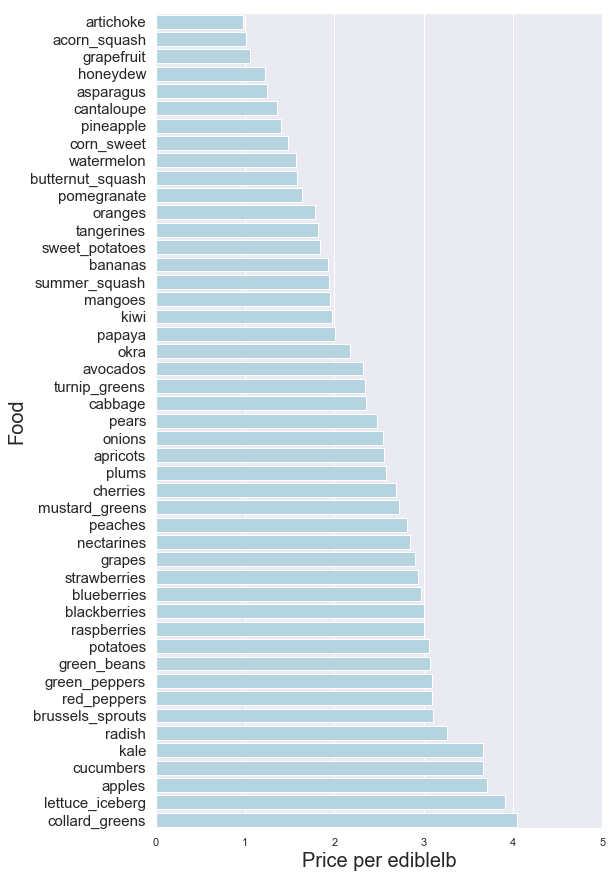

In [165]:
# Initialize the matplotlib figure
sns.set(rc={'figure.figsize':(8,15)})

# Plotting
p = sns.barplot(x='price_per_edible_lb', y='food', data= DF2, color="lightblue")
p.set(xlim=(0,5))

# labeling
plt.xlabel("Price per ediblelb", fontsize=20)
plt.ylabel("Food", fontsize=20)
plt.yticks(fontsize=15)
plt.show()

### 4. What's something surprising about this data set?
__(1)__ Considering the yeild factor and price per pound (price per edible pound), Raspberries is much more expensive than my thought. Also, my old thought about corn sweet is cheap, since US has the corn belt in the midwest. However, Corn_sweet is also in the top 6 expensive out of 49 food. This is really a suprise to me and reminds me of looking at data integrally (like considering the yeild and price per pound).

In [104]:
DF2[['food','price_per_edible_lb']].sort_values(by=['price_per_edible_lb'], ascending= False).head(10)

,food,price_per_edible_lb
20,raspberries,7.266470
26,asparagus,6.507216
3,blackberries,6.015321
25,artichoke,5.896615
4,blueberries,4.983812
33,corn_sweet,4.982635
41,okra,4.176299
6,cherries,3.905424
19,pomegranate,3.881411
48,turnip_greens,3.295665


__(2)__ By the definition of yield, it is the portion than edible. The weird part of the data set is that the yield of collard_greens,brussels_sprouts, and kale are larger than one. Probably, there were some calculation error for the yield.

In [108]:
FV_Data[['food','yield']].sort_values(by=['yield'], ascending= False).head(3)

,food,yield
32,collard_greens,1.16
28,brussels_sprouts,1.06
38,kale,1.05
